In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from skimage.transform import radon, iradon

tamano_rodaja = 1 # en pixeles
tamano_detector = 256 # en pixeles
max_ind = int((tamano_detector/tamano_rodaja) - 1) # Numero de rodajas (enteras)
numero_imagenes = 349

IMGs = []

for i in range(numero_imagenes):
    IMG = np.genfromtxt("Imagenes/CORR/corr_{}.txt".format(i))
    IMGs.append(IMG)

IMGs = np.array(IMGs)

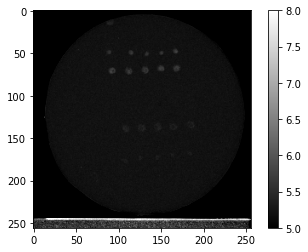

In [2]:
plt.imshow(IMGs[0], cmap="gray", vmin=5, vmax=8)
plt.colorbar()
plt.show()

In [3]:
sinograms = []

for ind in range(max_ind):
    projections = []
    for im in IMGs:
        rodaja = np.sum(im[tamano_rodaja*ind:tamano_rodaja*(ind+1), :], axis=0)
        projections.append(rodaja)
    
    projections = np.array(projections)
    sinograms.append(np.transpose(projections))

sinograms = np.array(sinograms)

del projections

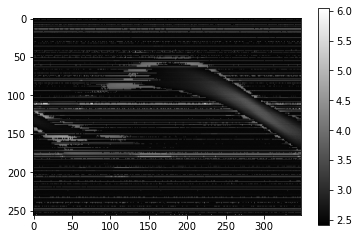

In [4]:
plt.imshow(sinograms[0],cmap="gray")
plt.colorbar()

In [5]:
theta = np.linspace(0.0, 208.8, numero_imagenes, endpoint=False)
rodajas = []

for ind, sinogram in enumerate(sinograms):
    reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='hann')
    plt.imshow(reconstruction_fbp, cmap="gray", vmin=0.02, vmax=0.04)
    plt.colorbar()
    plt.savefig("Imagenes_2/RODAJAS/rodaja_{}.png".format(ind))
    plt.clf()
    
    indx_sup = np.where(reconstruction_fbp >= 0.04)
    indx_inf = np.where(reconstruction_fbp <= 0.02)
    reconstruction_fbp[indx_sup[0], indx_sup[1]] = 0.04
    reconstruction_fbp[indx_inf[0], indx_inf[1]] = 0.02
    rodajas.append(reconstruction_fbp)

<Figure size 432x288 with 0 Axes>

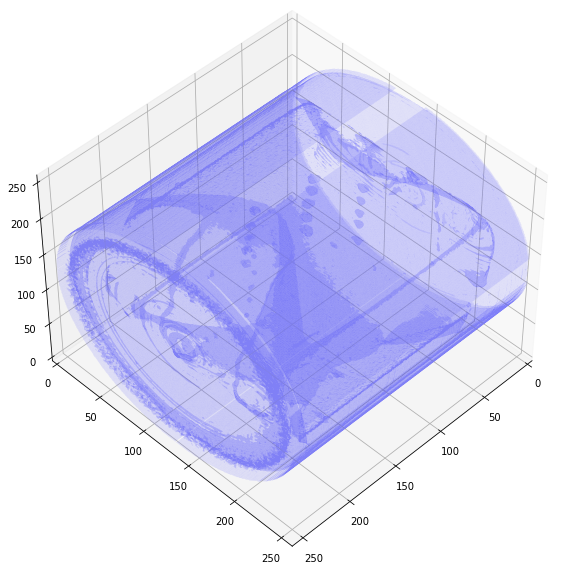

In [6]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure

def plot_3d(image, threshold=0.03): 
    verts, faces, normals, values = measure.marching_cubes(image, level=threshold , method='lewiner')
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    mesh = Poly3DCollection(verts[faces], alpha=0.2) #alpha =0.1
    face_color = [0.5, 0.5, 1]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)
    ax.set_xlim(0, 256)
    ax.set_ylim(0, 256)
    ax.set_zlim(0, 255)
    ax.view_init(45,45) # (polar, azimutal) 
    plt.show()

rodajas = np.array(rodajas)
plot_3d(rodajas)